In [1]:
# CNN_basic
# conv2d layer
# max pooling layer
# toy image 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.17.0'

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


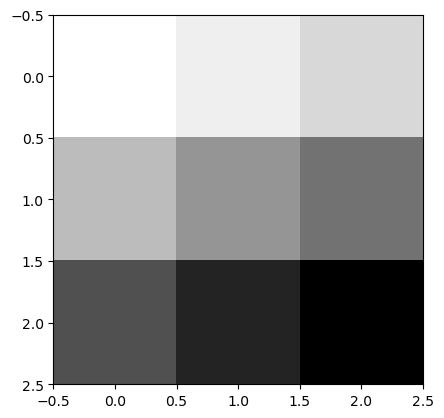

In [4]:
# 입력 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)
print(image)
print(image.shape)  # (1, 3, 3, 1) , Rank=4 , 4차원
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
(2, 2, 1, 1)
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


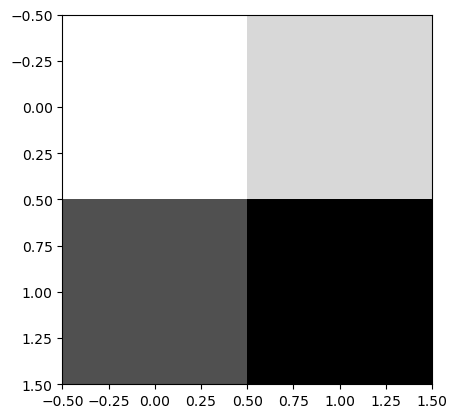

In [13]:
# CNN(Convolutional Neural Network)
# conv2d layer , filter : (2,2,1,1), strides : 1

# 입력 이미지 : (1,3,3,1)  , (N,H,W,C)
# 1 : 이미지의 갯수
# 3 : 세로 크기(Height)
# 3 : 가로 크기(Width)
# 1 : color, Grey scale ==> 1, RGB ==> 3

# filter : (2,2,1,1)
# 2 : 세로 크기
# 2 : 가로 크기
# 1 : color, Grey scale ==> 1, RGB ==> 3
# 1 : filter 의 갯수

# (N - F)/strides + 1
# 출력 이미지 : (3 - 2)/1 + 1 = 2, zero padding을 안했을 때 (padding='VALID')
# (1,3,3,1) ---> (1,2,2,1)

# filter : (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())
print(weight.shape)

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)   # (1, 2, 2, 1)

# 시각화
plt.imshow(conv2d_image.reshape(2,2),cmap='Greys')
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
(2, 2, 1, 1)
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)


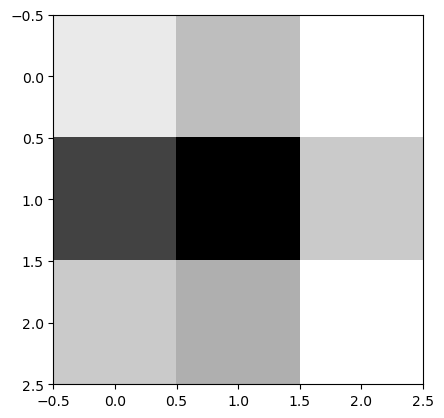

In [14]:
# 출력 이미지 : (3 + 1 - 2)/1 + 1 = 3, zero padding을 안했을 때 (padding='SAME')
# (1,3,3,1) ---> (1,3,3,1)

# filter : (2,2,1,1)  , strides : 1
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())
print(weight.shape)

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)   # (1, 3, 3, 1)

# 시각화
plt.imshow(conv2d_image.reshape(3,3),cmap='Greys')
plt.show()

[[[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]


 [[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]]
(2, 2, 1, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
(1, 3, 3, 3)
[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
(3, 3, 3, 1)
[[[12.]
  [16.]
  [ 9.]]

 [[24.]
  [28.]
  [15.]]

 [[15.]
  [17.]
  [ 9.]]]
[[[120.]
  [160.]
  [ 90.]]

 [[240.]
  [280.]
  [150.]]

 [[150.]
  [170.]
  [ 90.]]]
[[[-12.]
  [-16.]
  [ -9.]]

 [[-24.]
  [-28.]
  [-15.]]

 [[-15.]
  [-17.]
  [ -9.]]]


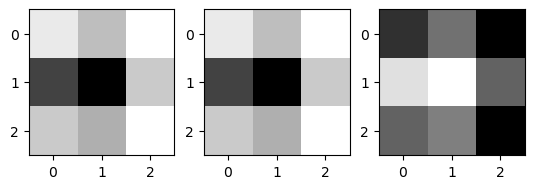

In [17]:
# conv2d layer, 3 filters, zero padding(padding='SAME')
# image : (1,3,3,1), filter : (2,2,1,3) , strides = (1,1,1,1)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],     
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight.numpy())
print(weight.shape) # (2, 2, 1, 3)

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)   # (1, 3, 3, 3)


# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
print(conv2d_image)
print(conv2d_image.shape) # (3, 3, 3, 1)

for i,one_image in enumerate(conv2d_image): # 3회
    print(one_image)
    plt.subplot(1,3,i + 1)
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show() 